### Dimension Reduction & Text Mining
FIRA 빅데이터 플랫폼 과정 <데이터마이닝> - 2017.08.31.목 14:00-18:00

### 1.  Feature Selection & Dimension Reduction
- 1-1. Review
- 1-2. RFE : Recursive Feature Elimination `sklearn.feature_selection.RFE`
- 1-3. PCA : `sklearn.decompostion.pca`
- 1-4. 실습 : 변수 선택을 활용한 신용 등급 분류 모델 만들기

### 2. Text Mining
- 2-1. Data : The Internet Movie Script Database (IMSDb)
- 2-2. Preprocessing : tokenizing, stemming, removing stopwords
- 2-3. Word Cloud
- 2-4. TF-IDF

### 1. Dimension Reduction
---

#### 1-1. Review

In [489]:
import pandas as pd

In [490]:
# 변수별 설명 : CodeList
pd.read_csv('CodeList-classification.csv').iloc[:, :4]

,변수명,설명,변수 종류,코드 설명
0,OBS#,관찰번호,-,일련번호
1,CHK_ACCT,당좌 예금 계좌 상태,범주형,"0 : 0 DM 미만, 1 : 0~200 DM 미만, 2 : 200 DM 이상, 3..."
2,DURATION,신용거래 개월 수,수치형,NaN
3,HISTORY,신용기록,범주형,"0 : 신용거래 없음, 1 : 기한 내 변제, 2 : 변제 기한 남음, 3 : 연체..."
4,NEW_CAR,신용목적,이진수형,신형 자동차 0 : 없음 1 : 있음
5,USED_CAR,신용목적,이진수형,중고 자동차 0 : 없음 1 : 있음
6,FURNITURE,신용목적,이진수형,가구/주방기기 0 : 없음 1 : 있음
7,RADIO/TV,신용목적,이진수형,라디오/TV 0 : 없음 1 : 있음
8,EDUCATION,신용목적,이진수형,교육 0 : 없음 1 : 있음
9,RETAINING,신용목적,이진수형,재교육 0 : 없음 1 : 있음


In [414]:
# df
df = pd.read_csv('german_classification.csv').set_index('OBS#')

##### Preprocessing : Dummy Variables & Scaling & Change Labels

In [415]:
# dummy varaibles : preprocessed_df
get_dummies_cols = ['CHK_ACCT', 'HISTORY', 'SAV_ACCT', 'EMPLOYMENT', 'JOB']
dummied_df = pd.get_dummies(df, columns=get_dummies_cols)

# scaling
scaling_cols = ['DURATION', 'INSTALL_RATE', 'AGE', 'NUM_CREDITS', 'AMOUNT']
preprocessed_df = dummied_df.copy()
preprocessed_df[scaling_cols] = (preprocessed_df[scaling_cols]-preprocessed_df[scaling_cols].min()) / (preprocessed_df[scaling_cols].max()-preprocessed_df[scaling_cols].min())

# change Label
preprocessed_df.RESPONSE = df.RESPONSE-1

# split X, y 
X, y = preprocessed_df.drop('RESPONSE', axis=1), preprocessed_df.RESPONSE

##### Train-Test Split : `sklearn.model_selection.train_test_split`

In [416]:
# import packages
from sklearn.model_selection import train_test_split

# train_test_split with 'stratify'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=77, stratify=y)

##### `sklearn.linear_model.LogisiticRegression`

In [417]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# parameters
class_weight = 'balanced'

# model
raw_model = LogisticRegression(class_weight=class_weight)
raw_model.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [418]:
def result(fitted_model, X_test, y_test):
    # pred 
    # score
    # conf_mat
    pred = fitted_model.predict(X=X_test)
    score = fitted_model.score(X=X_test, y=y_test)
    conf_mat = confusion_matrix(y_pred=pred, y_true=y_test)
    return [pred, score, conf_mat]

In [420]:
# result
raw_result = result(raw_model, X_test, y_test)

#### 1-2. RFE : Recursive Feature Elimination `sklearn.feature_selection.RFE`

In [424]:
# import packages
from sklearn.feature_selection import RFE

In [425]:
# estimator & selector
selector = RFE(raw_model)

In [426]:
# fit to selector
selector.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=None, step=1, verbose=0)

In [427]:
# n_features_, ranking, support
print(selector.n_features_)
print(selector.ranking_)
print(selector.support_)

24
[ 1  1  1 11  6  1  1  1  1 20  1 21  2  1 23  7  1  1  1 22 18  1 19  8  1
  3  4  1  1  1  1 15 14  1 12  1 16  1  1 13  1 24  1 17  5 10 25  9]
[ True  True  True False False  True  True  True  True False  True False
 False  True False False  True  True  True False False  True False False
  True False False  True  True  True  True False False  True False  True
 False  True  True False  True False  True False False False False False]


In [428]:
# change X to selected_X_train, selected_X_test
# selected_cols = 
selected_cols = selector.support_
selected_X_train, selected_X_test = X_train.iloc[:, selected_cols], X_test.iloc[:, selected_cols]

In [429]:
# fitting new model
RFE_model = selector.estimator_
RFE_model.fit(X=X_selected_train, y=y_train)

# get result
RFE_result = result(RFE_model, X_selected_test, y_test)

#### 1-3. PCA : `sklearn.decompostion.pca`

In [430]:
from sklearn.decomposition import pca

In [431]:
# parameter : n_components
n_components = [5, 10, 15, 20, 25]

In [432]:
pca_model = raw_model

for n in n_components:
    # decomposer
    # fit
    # .transform
    pca_decomposer = pca.PCA(n_components=n)
    pca_decomposer.fit(X=X_train)
    X_pca_train, X_pca_test = pca_decomposer.transform(X_train), pca_decomposer.transform(X_test)
    print(n, sum(pca_decomposer.explained_variance_ratio_))
    
    # fit new estimator
    # result
    pca_model.fit(X=X_pca_train, y=y_train)
    pca_result = result(pca_model, X_pca_test, y_test)
    print(pca_result)

5 0.422430020015
[array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0]), 0.65600000000000003, array([[108,  67],
       [ 19,  56]])]
10 0.621884657661
[array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 

#### 1-4. 실습 : 변수 선택을 활용한 신용 등급 분류 모델 만들기
---
1. 변수 선택을 적용한 신용 등급 분류 모델 만들기
    * RFE, PCA 중 반드시 하나를 사용할 것
    * 변수 선택 하지 않은 모델(모든 변수를 사용한 모델)과 성능을 비교할 것
    
2. 변수 선택을 활용했을 때의 장점은 무엇인가?


In [436]:
print(raw_result[1])
print(RFE_result[1])
# 필요한 변수의 수를 절반으로 줄여 복잡도는 크게 감소시키면서, 최대한의 정확도를 보장할 수 있어 좋다

0.7
0.68


### 2. Text Mining
---
#### 2-1. Data : The Internet Movie Script Database (IMSDb)
.txt 파일을 받을 수 있는 사이트 - https://figshare.com/projects/imsdb_movie_scripts/18907

In [407]:
pd.read_csv('imsdb_sample.csv')

,Movie Name
0,10 Things I Hate About You
1,12
2,12 and Holding
3,12 Monkeys
4,12 Years a Slave
5,127 Hours
6,1492: Conquest of Paradise
7,15 Minutes
8,17 Again
9,187


[Task] 3개의 영화 script를 다운로드 받는다.

#### 2-2. Preprocessing : tokenizing, stemming, removing stopwords
---

In [441]:
# open script
with open('Script_Inception.txt','r') as f:
    raw_script = f.read()

In [442]:
# tokenizing
from nltk.tokenize import RegexpTokenizer
# tokenizer
# tokens
tokenizer = RegexpTokenizer(r'\w+')
tokens = [x.lower() for x in tokenizer.tokenize(raw_script)]

In [443]:
# stemming
from nltk.stem import PorterStemmer

# .stem(token)
stemmed_tokens = [PorterStemmer().stem(token) for token in tokens]

In [444]:
# removing stopwords
from nltk.corpus import stopwords

# .words('english')
stopwords_removed_tokens = [x for x in stemmed_tokens if x not in stopwords.words('english')]

In [445]:
def preprocessed(raw_script):
    # tokenize
    tokens = [x.lower() for x in RegexpTokenizer(r'\w+').tokenize(raw_script)]
    
    # stemming
    stemmed_tokens = [PorterStemmer().stem(token) for token in tokens]

    # removing stopwords
    stopwords_removed_tokens = [x for x in stemmed_tokens if x not in stopwords.words('english')]
    return ' '.join(stopwords_removed_tokens)

In [446]:
preprocessed_1 = preprocessed(raw_script)

##### 실습 : 나머지 2개의 영화에 대해서도 수행

In [448]:
preprocessed_scripts = [preprocessed_1, preprocessed_2, preporcessed_3]

NameError: name 'preprocessed_1' is not defined

#### 2-3. Word Cloud
---
`conda install -c https://conda.anaconda.org/amueller wordcloud`
- [Reference](https://github.com/amueller/word_cloud)

##### Bag of words : `sklearn.feature_extraction.text.CountVectorizer`

In [454]:
# import packages
from sklearn.feature_extraction.text import CountVectorizer

In [455]:
#vectorizer
vectorizer= CountVectorizer(min_df=1)

In [456]:
# bows
bows = vectorizer.fit_transform(scripts)
bows = bows.toarray()

##### Word Cloud : `wordcloud.WordCloud`

In [458]:
# import packages
from wordcloud import WordCloud

In [462]:
# initialize
wordcloud = WordCloud()

In [465]:
# sort bows by count
vocabs = vectorizer.get_feature_names()
counts = bows.tolist()[1]
sorted_bows = sorted(zip(vocabs, counts), key = lambda t: t[1], reverse=True)

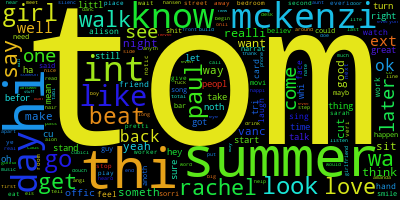

In [466]:
# wordcloud.fit_words(list of tuples (word, cnt))
wordcloud.fit_words(sorted_bows).to_image()

In [467]:
# is there more words to remove?
sorted_bows

[('tom', 867),
 ('summer', 438),
 ('thi', 139),
 ('hi', 136),
 ('mckenzi', 114),
 ('int', 102),
 ('know', 98),
 ('day', 85),
 ('like', 80),
 ('look', 77),
 ('girl', 76),
 ('paul', 71),
 ('go', 69),
 ('beat', 68),
 ('rachel', 63),
 ('wa', 61),
 ('say', 59),
 ('love', 57),
 ('walk', 56),
 ('get', 55),
 ('later', 55),
 ('see', 54),
 ('come', 51),
 ('one', 47),
 ('back', 44),
 ('ok', 44),
 ('well', 44),
 ('ext', 43),
 ('realli', 43),
 ('want', 43),
 ('think', 41),
 ('someth', 40),
 ('yeah', 40),
 ('night', 39),
 ('vanc', 39),
 ('cut', 38),
 ('good', 37),
 ('make', 37),
 ('sit', 37),
 ('way', 36),
 ('offic', 35),
 ('right', 35),
 ('cu', 33),
 ('thing', 33),
 ('noth', 32),
 ('oh', 32),
 ('take', 32),
 ('whi', 32),
 ('befor', 30),
 ('ha', 29),
 ('stand', 29),
 ('time', 29),
 ('tri', 29),
 ('turn', 27),
 ('hey', 26),
 ('mean', 26),
 ('talk', 26),
 ('littl', 25),
 ('peopl', 25),
 ('start', 25),
 ('still', 25),
 ('got', 24),
 ('great', 24),
 ('let', 24),
 ('sure', 24),
 ('alison', 23),
 ('card',

In [474]:
# remove words
stopwords_for_script = ['cobb', 'arthur', 'ariadn', 'fischer', 'saito', 'yusuf', 'hi', 'int', 'tom', 'summer', 'mckenzi', 'paul', 'rachel']
filtered_sorted_bows = [x for x in sorted_bows if x[0] not in stopwords_for_script]

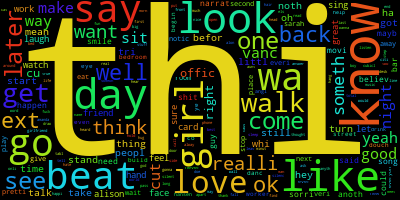

In [475]:
# wordcloud
wordcloud.fit_words(filtered_sorted_bows).to_image()

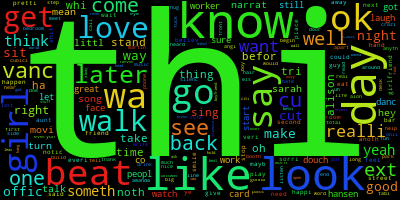

In [348]:
wordcloud.fit_words(character_removed_word_tfidf).to_image()

#### 2-4. TF-IDF
---
- TF(Term Frequency) : 해당 단어가 얼마나 '자주' 등장하는지 알 수 있음
- IDF(Inverse Document Frequency) : 해당 단어가 얼마나 '희귀하게' 등장하는지 알 수 있음
- ?

In [ ]:
# import packages
from sklearn.feature_extraction.text import TfidfTransformer


In [484]:
# transformer
transformer = TfidfTransformer() # tfidf 변환 인스턴스 생성

In [486]:
# fit_transform
tfidf_bows = transformer.fit_transform(bows)
tfidf_bows = tfidf_bows.toarray()

In [487]:
# sorted_tfidf
vocabs = vectorizer.get_feature_names()
counts = tfidf_bows.tolist()[1]
sorted_tfidf_bows = sorted(zip(vocabs, counts), key = lambda t: t[1], reverse=True)

# remove words
filtered_sorted_tfidf_bows = [x for x in sorted_tfidf_bows if x[0] not in stopwords_for_script]

# wordcloud

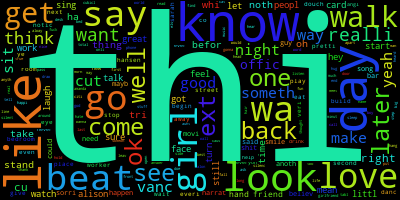

In [488]:
wordcloud.fit_words(filtered_sorted_bows).to_image()

##### 실습 : 나머지 2개의 영화에 대한 word cloud 그리기